In [1]:
# Regression Analysis & Cross-Validation

In [2]:
#| echo: false
#| code-fold: true
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
import json
np.random.seed(42)
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import holoviews as hv
import pandas as pd
import panel as pn
import numpy as np
import hvplot.pandas 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import requests
import cenpy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

C:\Users\cruse\mambaforge1\envs\musa-550-fall-2023\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
C:\Users\cruse\mambaforge1\envs\musa-550-fall-2023\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
C:\Users\cruse\mambaforge

In [3]:
## Plotting A Correlation Matrix

In [4]:
#| echo: true
#| code-fold: true
regression_df = pd.read_csv('regression_df.csv')

In [5]:
#| echo: true
#| code-fold: true
model = LinearRegression()
model

LinearRegression()

In [6]:
#| echo: true
#| code-fold: true
X = regression_df[['hw_value', 'oc_value', 'pmc_value', 'E_PARK', 'E_HOUAGE', 'smoking_prevalance','E_ROAD','blk_percent','white_percent','latino_percent', 'asian_percent', 'other_percent']].values
y = regression_df['asthma_prevalance'].values

In [8]:
#| echo: true
#| code-fold: true
feature_cols = [col for col in regression_df.columns if col not in ["asthma_prevalance", "geoid"]]
train_set, test_set = train_test_split(regression_df, test_size=0.3, random_state=42)
y_train = train_set["asthma_prevalance"].values
y_test = test_set["asthma_prevalance"].values
X_train = train_set[feature_cols].values
X_test = test_set[feature_cols].values


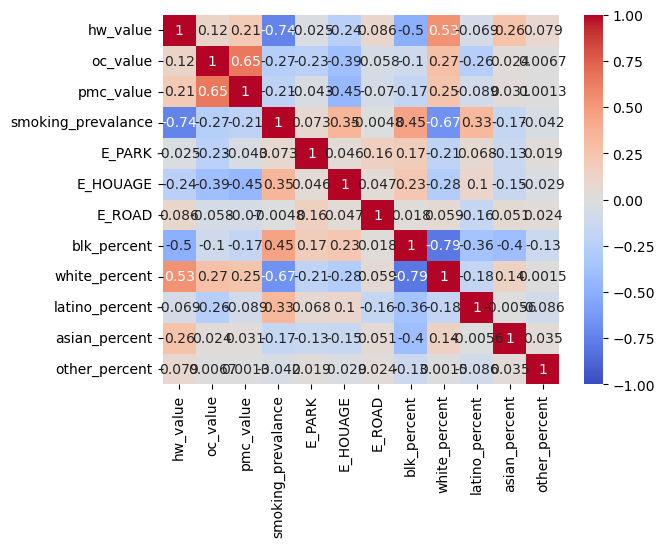

In [9]:
#| echo: true
#| code-fold: true
sns.heatmap(
    train_set[feature_cols].corr(), 
    cmap="coolwarm", 
    annot=True, 
    vmin=-1, 
    vmax=1
);

In [10]:
#| echo: true
#| code-fold: true
X.shape

(1179, 12)

In [11]:
#| echo: true
#| code-fold: true
y.shape

(1179,)

In [12]:
#| echo: true
#| code-fold: true
model.fit(X, y)

LinearRegression()

In [13]:
#| echo: true
#| code-fold: true
Rsq = model.score(X, y)
Rsq

0.8813734475169395

In [14]:
#| echo: true
#| code-fold: true
linear_pipe = make_pipeline(StandardScaler(), LinearRegression())

print("Linear regression")
linear_pipe.fit(X_train, y_train)

training_score = linear_pipe.score(X_train, y_train)
print(f"Training Score = {training_score}")

test_score = linear_pipe.score(X_test, y_test)
print(f"Test Score = {test_score}")

Linear regression
Training Score = 0.8771018545312711
Test Score = 0.889628138385183


In [15]:
#| echo: true
#| code-fold: true
forest_pipe = make_pipeline(
    StandardScaler(),  # Pre-process step
    RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42),  # Model step
)

print("Random forest")
forest_pipe.fit(X_train, y_train)

training_score = forest_pipe.score(X_train, y_train)
print(f"Training Score = {training_score}")

test_score = forest_pipe.score(X_test, y_test)
print(f"Test Score = {test_score}")

Random forest
Training Score = 0.802226720882675
Test Score = 0.7982253593098484


In [16]:
#| echo: true
#| code-fold: true
forest_pipe.named_steps
forest_model = forest_pipe['randomforestregressor']

In [17]:
#| echo: true
#| code-fold: true
forest_model.feature_importances_

array([0.13976872, 0.        , 0.        , 0.3803543 , 0.        ,
       0.        , 0.        , 0.04474563, 0.43513135, 0.        ,
       0.        , 0.        ])

In [18]:
#| echo: true
#| code-fold: true
importance = pd.DataFrame(
    {"Feature": feature_cols, "Importance": forest_model.feature_importances_}
).sort_values("Importance", ascending=False)

In [19]:
#| echo: true
#| code-fold: true
importance

,Feature,Importance
8,white_percent,0.435131
3,smoking_prevalance,0.380354
0,hw_value,0.139769
7,blk_percent,0.044746
1,oc_value,0.000000
2,pmc_value,0.000000
4,E_PARK,0.000000
5,E_HOUAGE,0.000000
6,E_ROAD,0.000000
9,latino_percent,0.000000


In [20]:
#| echo: true
#| code-fold: true
import hvplot.pandas
importance.sort_values("Importance", ascending=True).hvplot.barh(
    x="Feature", y="Importance", title="Factors that Impact Asthma Prevalance"
)

:Bars   [Feature]   (Importance)

In [21]:
#| echo: true
#| code-fold: true
model = linear_pipe['linearregression']

In [22]:
#| echo: true
#| code-fold: true
linear_pipe = make_pipeline(StandardScaler(), LinearRegression())

# Run the 3-fold cross validation
scores = cross_val_score(
    linear_pipe,
    X_train,
    y_train,
    cv=3,
)

# Report
print("R^2 scores = ", scores)
print("Scores mean = ", scores.mean())
print("Score std dev = ", scores.std())

R^2 scores =  [0.87672721 0.86979481 0.86632107]
Scores mean =  0.8709476945361351
Score std dev =  0.004325797875727253


In [23]:
#| echo: true
#| code-fold: true
forest_pipe = make_pipeline(
    StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)
)

# Run the 3-fold cross validation
scores = cross_val_score(
    forest_pipe,
    X_train,
    y_train,
    cv=3,
)

# Report
print("R^2 scores = ", scores)
print("Scores mean = ", scores.mean())
print("Score std dev = ", scores.std())

R^2 scores =  [0.8692119  0.91654952 0.9188434 ]
Scores mean =  0.9015349385674881
Score std dev =  0.022875019221878082


In [24]:
#| echo: true
#| code-fold: true
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [25]:
#| echo: true
#| code-fold: true
pipe.named_steps

{'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42)}

In [26]:
#| echo: true
#| code-fold: true
model_step = "randomforestregressor"
param_grid = {
    f"{model_step}__n_estimators": [5, 10, 15, 20, 30, 50, 100, 200],
    f"{model_step}__max_depth": [2, 5, 7, 9, 13, 21, 33, 51],
}

param_grid

{'randomforestregressor__n_estimators': [5, 10, 15, 20, 30, 50, 100, 200],
 'randomforestregressor__max_depth': [2, 5, 7, 9, 13, 21, 33, 51]}

In [27]:
#| echo: true
#| code-fold: true
grid = GridSearchCV(pipe, param_grid, cv=3, verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'randomforestregressor__max_depth': [2, 5, 7, 9, 13,
                                                              21, 33, 51],
                         'randomforestregressor__n_estimators': [5, 10, 15, 20,
                                                                 30, 50, 100,
                                                                 200]},
             verbose=1)

In [28]:
#| echo: true
#| code-fold: true
def evaluate_mape(model, X_test, y_test):
    """
    Given a model and test features/targets, print out the 
    mean absolute error and accuracy
    """
    # Make the predictions
    predictions = model.predict(X_test)

    # Absolute error
    errors = abs(predictions - y_test)
    avg_error = np.mean(errors)

    # Mean absolute percentage error
    mape = 100 * np.mean(errors / y_test)

    # Accuracy
    accuracy = 100 - mape

    print("Model Performance")
    print(f"Average Absolute Error: {avg_error:0.4f}")
    print(f"Accuracy = {accuracy:0.2f}%.")

    return accuracy

In [30]:
#| echo: true
#| code-fold: true
base_model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

# Fit the training set
base_model.fit(X_train, y_train)

# Evaluate on the test set
base_accuracy = evaluate_mape(base_model, X_test, y_test)

Model Performance
Average Absolute Error: 0.2733
Accuracy = 97.68%.


In [49]:
#| echo: true
#| code-fold: true
data = regression_df.loc[test_set.index]

In [50]:
censustracts = gpd.read_file('Census_Tracts_2010.geojson')
tract_and_geoid = censustracts[['GEOID10', 'TRACTCE10']]
tract_and_geoid = tract_and_geoid.rename(columns = {'TRACTCE10':'tract'})

censustracts = censustracts[['GEOID10', 'geometry']]
censustracts = censustracts.rename(columns = {'GEOID10':'geoid'})
censustracts['geoid'] = censustracts['geoid'].astype(np.int64)

In [51]:
#| echo: true
#| code-fold: true
data['prediction'] = base_model.predict(X_test)
data.to_csv('data.csv', index=False)

In [52]:
#| echo: true
#| code-fold: true
data = pd.merge(data, censustracts, on='geoid', how ='inner')

In [53]:
#| echo: true
#| code-fold: true
data = gpd.GeoDataFrame(data, geometry = 'geometry')

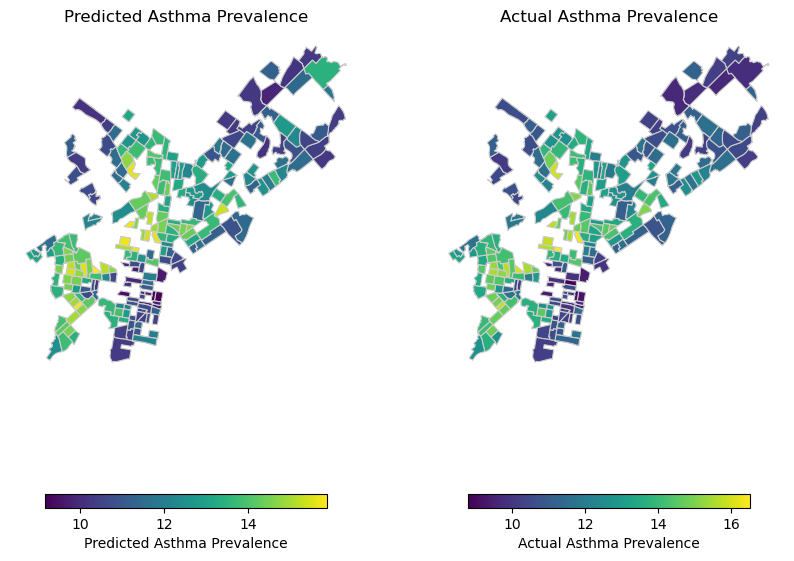

In [54]:
#| echo: true
#| code-fold: true
fig, axs = plt.subplots(ncols=2, figsize=(10, 10))

# Predicted values
data.plot(
    ax=axs[0],
    column='prediction',
    legend=True,
    cmap='viridis',
    linewidth=0.8,
    edgecolor='0.8',
    legend_kwds={'label': "Predicted Asthma Prevalence", 'orientation': "horizontal", 'shrink': 0.8}
)
axs[0].set_title("Predicted Asthma Prevalence")

# Actual values
data.plot(
    ax=axs[1],
    column='asthma_prevalance',
    legend=True,
    cmap='viridis',
    linewidth=0.8,
    edgecolor='0.8',
    legend_kwds={'label': "Actual Asthma Prevalence", 'orientation': "horizontal", 'shrink': 0.8}
)
axs[1].set_title("Actual Asthma Prevalence")

axs[0].set_axis_off()
axs[1].set_axis_off()

plt.show()

In [45]:
#| echo: true
#| code-fold: true


TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x00000286BF603E80>' as a data type